In [69]:
import os
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

@ticker.FuncFormatter
def million_formatter(x, pos):
    return "%.0f M" % (x/1E6)

def plot_subfolder_files(folder_path):

    for root, dirs, _ in os.walk(folder_path):
        for dir_name in dirs:
            subfolder_path = os.path.join(root, dir_name)
            labels_path = os.path.join(subfolder_path, "labels.json")
            data_files = [f for f in os.listdir(subfolder_path) if f.endswith(".json") and f != "labels.json"]
            x_scale = "Thousands"

            if os.path.isfile(labels_path) and data_files:
                with open(labels_path, "r") as labels_file:
                    labels_data = json.load(labels_file)
                    x_label = labels_data.get("x-axis")
                    y_label = labels_data.get("y-axis")
                    x_scale = labels_data.get("x-scale")
                
                fig, ax = plt.subplots(figsize=(8, 5))

                if x_scale == "Millions":
                    ax.xaxis.set_major_formatter(million_formatter)
                    
                plt.title(dir_name)
                plt.xlabel(x_label)
                plt.ylabel(y_label)
                
                for data_file in data_files:
                    file_path = os.path.join(subfolder_path, data_file)
                    with open(file_path, "r") as data_file:
                        data = json.load(data_file)
                        x = [point[1] for point in data]
                        y = [point[2] for point in data]
                        plt.plot(x, y, label=os.path.basename(file_path[:-5]) if len(data_files) > 1 else None)
                
                plt.legend(loc='best', fontsize='small')
                plt.savefig(os.path.join(folder_path, f"{dir_name}.png"))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


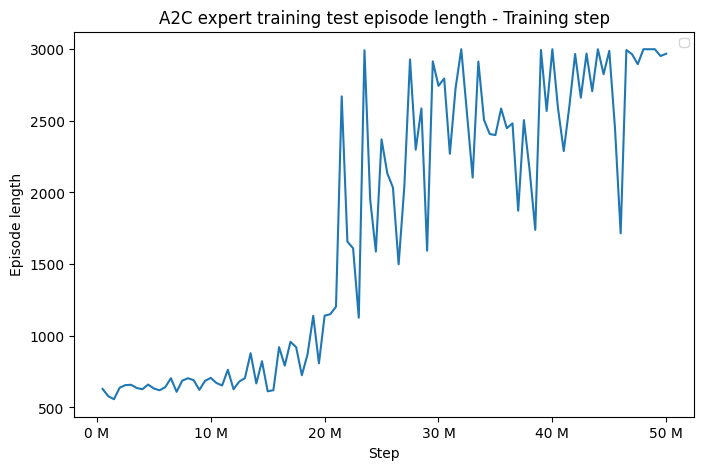

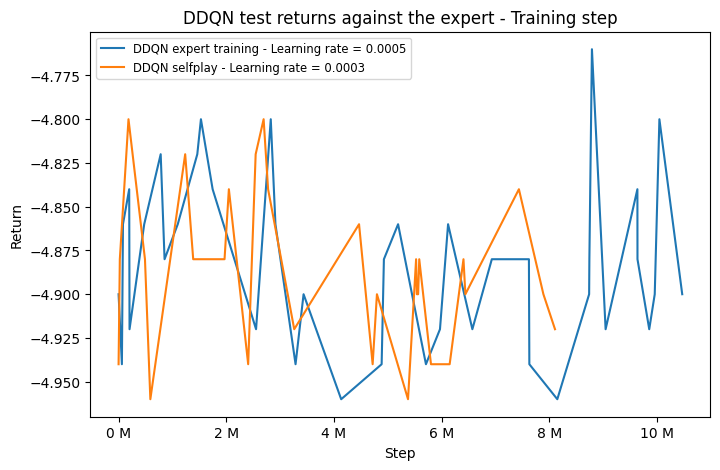

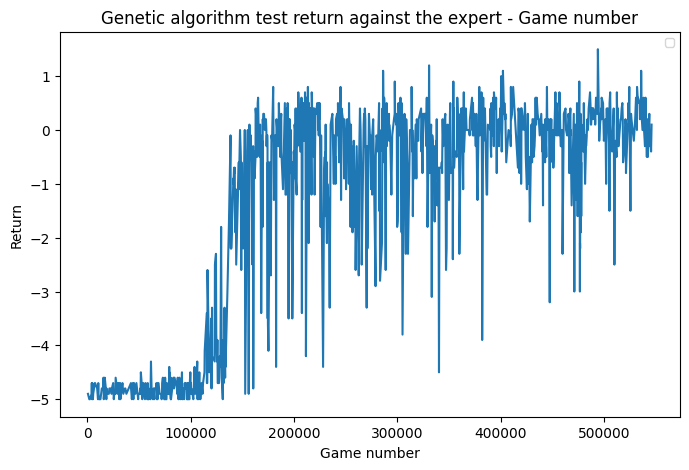

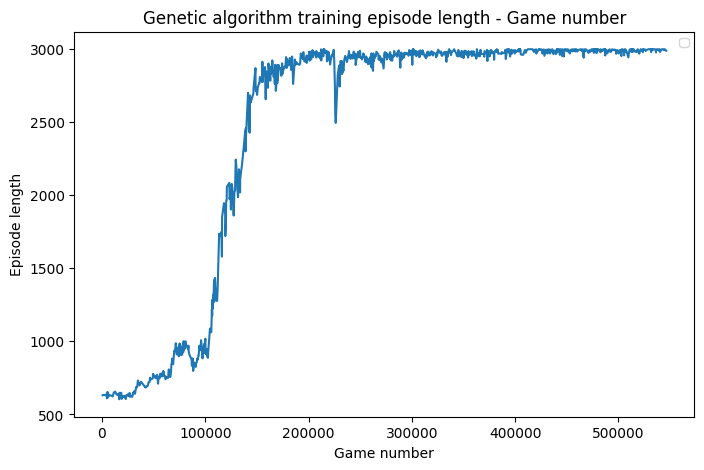

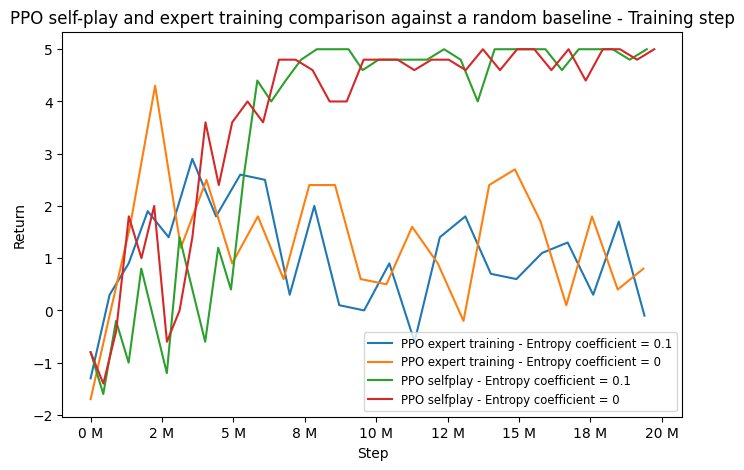

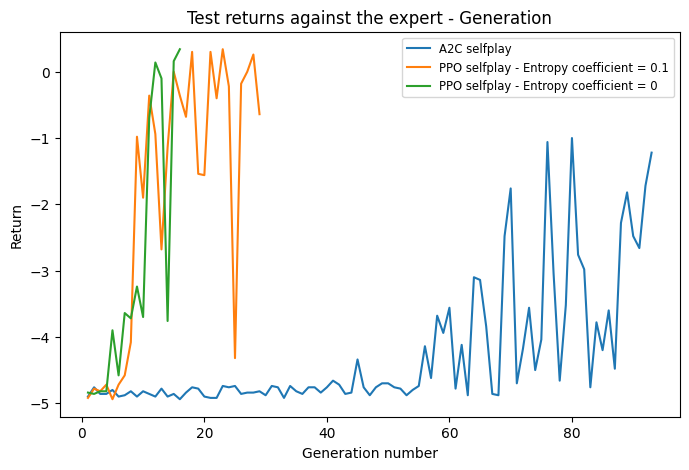

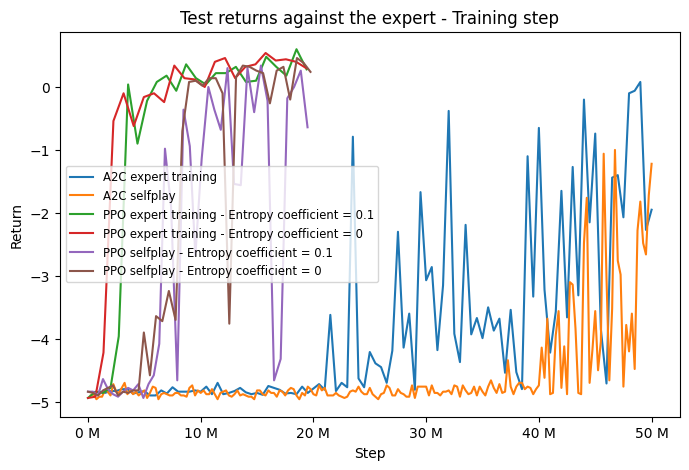

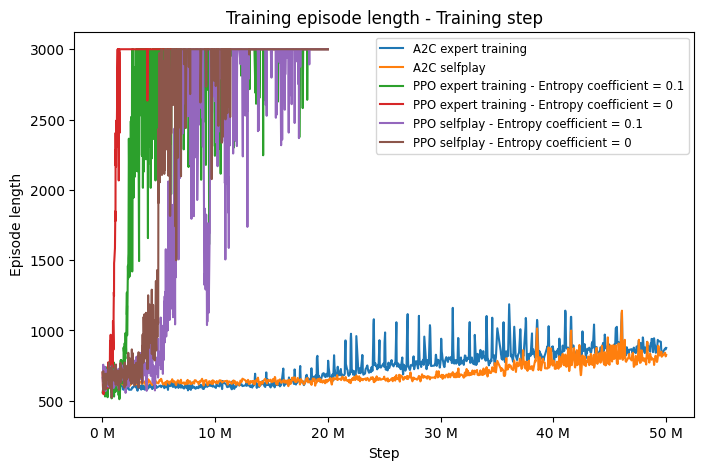

In [70]:
plot_subfolder_files("Plots")